# DBSCAN 

Hands on! Another notebook??? Yes. More toy data? Yes!. Can you guess why? In real life, many datasets are not linearly separable, neither have clear shapes. Datasets for DBSCAN are hard to find, but it usually works great for spacial data. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid


In [67]:
df = pd.read_csv("0",header=None,delim_whitespace=True)

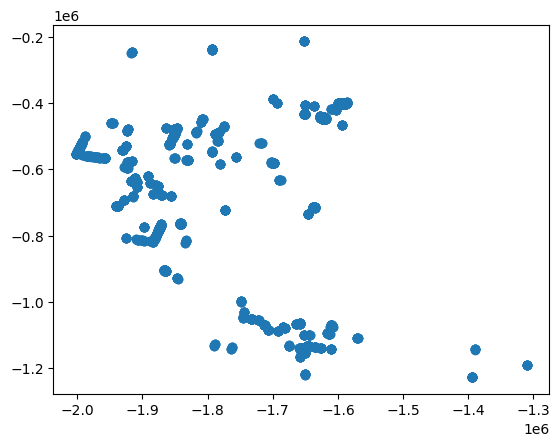

In [68]:
plt.scatter(df[0], df[1])
plt.show()

In [5]:
#Check the data, is there a need for any preprocessing?
X = df.to_numpy()
X

array([[-1652585,  -214432],
       [-1652462,  -214142],
       [-1652569,  -214594],
       ...,
       [-1717280,  -520794],
       [-1717280,  -520794],
       [-1721782,  -519416]], dtype=int64)

In [6]:
df.head()

,0,1
0,-1652585,-214432
1,-1652462,-214142
2,-1652569,-214594
3,-1652569,-214594
4,-1652701,-214514


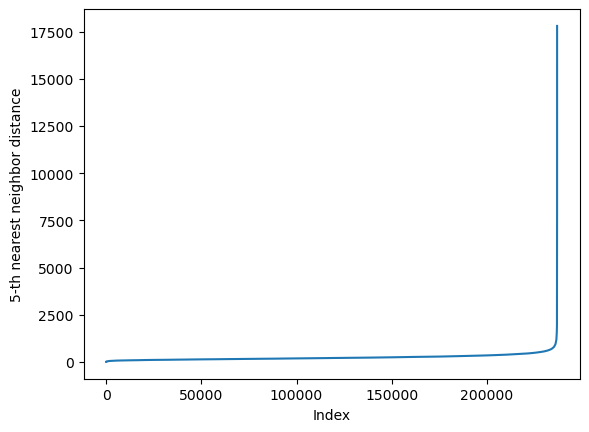

Value of eps: 12245.666


In [84]:
from sklearn.neighbors import NearestNeighbors

# Compute the distance to each point's 5th nearest neighbor
k = 5
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort the distances in ascending order
sorted_distances = np.sort(distances[:,k-1])

# Plot the k-distance graph
plt.plot(np.arange(len(X)), sorted_distances)
plt.xlabel("Index")
plt.ylabel(f"{k}-th nearest neighbor distance")
plt.show()
diffs = np.diff(sorted_distances)
second_diffs = np.diff(diffs)

# Identify the index of the knee point
knee_idx = np.argmax(second_diffs) + 1

# Extract the distance value at the knee point
eps = sorted_distances[knee_idx]

# Print the value of eps
print(f"Value of eps: {eps:.3f}")

In [85]:
# The challenge here is how to chose the two values for DBSCAN. Remember that it will find the number of clusters, 
# but we need to specify how many points should be in the neighbourhood of eps radius.
clustering = DBSCAN(eps=12245.666, min_samples=10).fit(X)

In [78]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimated number of clusters: 49
Estimated number of noise points: 236339


KeyboardInterrupt: 

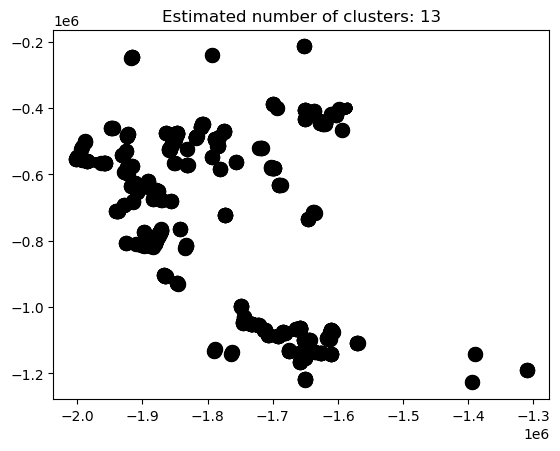

In [16]:
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [14]:

param_grid = {
    "eps": [0.1, 0.5, 1.0],
    "min_samples": [2, 5, 10],
}

results = []

for params in ParameterGrid(param_grid):
    clustering = DBSCAN(**params).fit(X)
    labels = clustering.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    if n_clusters > 1:
        silhouette_score = metrics.silhouette_score(X, labels)
    else:
        silhouette_score = np.nan
    results.append((params, n_clusters, n_noise, silhouette_score))

results_df = pd.DataFrame(results, columns=["params", "n_clusters", "n_noise", "silhouette_score"])
best_params = results_df.loc[results_df["silhouette_score"].idxmax(), "params"]
print(f"Best parameters: {best_params}")

Best parameters: {'eps': 0.1, 'min_samples': 2}


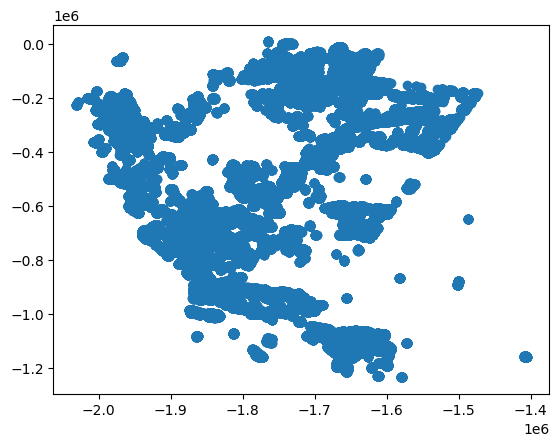

In [53]:

df = pd.read_csv("33",header=None,delim_whitespace=True)
plt.scatter(df[0], df[1])
plt.show()
X = df.to_numpy()
X

In [65]:
clustering = DBSCAN(eps=100, min_samples=8).fit(X)

In [ ]:

labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

In [ ]:
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [ ]:
df = pd.read_csv("91",header=None,delim_whitespace=True)
plt.scatter(df[0], df[1])
plt.show()
X = df.to_numpy()
X

In [ ]:
clustering = DBSCAN(eps=100, min_samples=8).fit(X)

In [ ]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}"

In [ ]:
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()